In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Betweenness Centrality Measure

We will compute betweenness centrality for nodes and edges in a small graph. Then, we will compute the centrality measures using `Networkx` library. Finally, we will apply the measure on a real-world network.

Let $G$ be a graph with $n$ nodes.

1. **Betweenness centrality of a node $v$** is the sum of the fraction of all-pairs shortest paths that pass through  $v$

   $$c_B(v) =\displaystyle \sum_{s,t \in V} \frac{p_{s, t}(v)}{p_{s, t}}$$

   where $V$ is the set of nodes, $p_{s, t}$ is the number of shortest $(s, t)$-paths,  and $p_{s, t}(v)$ is the number of those paths  passing through the node $v$ other than $s, t$. If $s = t$, $p_{s, t} = 1$, and if $v \in \{s, t\}$, $p_{s, t}(v) = 0$.

   **Normaized betweenness centrality of a node $v$** is the betweenness centrality of the node $v$ divided by $$\displaystyle \frac{(n-1)(n-2)}{2}$$ for graphs, and by $$((n-1)(n-2))$$ for directed graphs.

2. **Betweenness centrality of an edge $e$** is the sum of the fraction of all-pairs shortest paths that pass through $e$

   $$c_B(e) =\displaystyle \sum_{s,t \in V} \frac{p_{s, t}(e)}{p_{s, t}}$$

   where $V$ is the set of nodes, $p_{s, t})$ is the number of shortest $(s, t)$-paths, and $p_{s, t}(e)$ is the number of those paths passing through edge $e$.

   **Normalized betweenness centrality of an edge $e$** is the betweenness centrality of the edge $e$ divided by $\displaystyle \frac{n(n-1)}{2}$ for graphs, and by ${n(n-1)}$ for directed graphs.

## A Small Example 

### Example 1

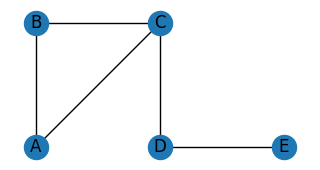

In [2]:
G = nx.Graph()
G.add_edges_from([('A','B'), ('A','C'), ('C','D'), ('B','C'), ('D','E') ])
positions = {'A': np.array([ 0,0]), 'B': np.array([0,1]), 'C': np.array([ 1,1]), 
             'D': np.array([1,0]), 'E': np.array([2,0])}
plt.figure(figsize=(3,1.5))
nx.draw(G, pos=positions)
_ = nx.draw_networkx_labels(G, positions)

Compute **manually** betweenness and normalized betweenness for all nodes and edges:

In [3]:
# betweenness
G.nodes['A']['betweenness'] = 0
G.nodes['B']['betweenness'] = 0
G.nodes['C']['betweenness'] = 4
G.nodes['D']['betweenness'] = 3
G.nodes['E']['betweenness'] = 0


G.edges['A','B']['betweenness'] = 1
G.edges['A','C']['betweenness'] = 3
G.edges['B','C']['betweenness'] = 3
G.edges['C','D']['betweenness'] = 6
G.edges['D','E']['betweenness'] = 4

# normalized betweenness
G.nodes['A']['normalized_betweenness'] = 0/6
G.nodes['B']['normalized_betweenness'] = 0/6
G.nodes['C']['normalized_betweenness'] = 4/6
G.nodes['D']['normalized_betweenness'] = 3/6
G.nodes['E']['normalized_betweenness'] = 0/6


G.edges['A','B']['normalized_betweenness'] = 1/10
G.edges['A','C']['normalized_betweenness'] = 3/10
G.edges['B','C']['normalized_betweenness'] = 3/10
G.edges['C','D']['normalized_betweenness'] = 6/10
G.edges['D','E']['normalized_betweenness'] = 4/10

In [4]:
import itertools

for source, target in itertools.combinations(G.nodes(), 2):
    print(list(nx.all_shortest_paths(G, source, target)))

[['A', 'B']]
[['A', 'C']]
[['A', 'C', 'D']]
[['A', 'C', 'D', 'E']]
[['B', 'C']]
[['B', 'C', 'D']]
[['B', 'C', 'D', 'E']]
[['C', 'D']]
[['C', 'D', 'E']]
[['D', 'E']]


In [5]:
btwns_centrality = nx.betweenness_centrality(G, normalized=False)

for n in G.nodes():
    print(f"Betweenness centrality of node {n}: manually {G.nodes[n]['betweenness']}"
          f" networkx {btwns_centrality[n]}")

Betweenness centrality of node A: manually 0 networkx 0.0
Betweenness centrality of node B: manually 0 networkx 0.0
Betweenness centrality of node C: manually 4 networkx 4.0
Betweenness centrality of node D: manually 3 networkx 3.0
Betweenness centrality of node E: manually 0 networkx 0.0


In [6]:
norm_btwns_centrality = nx.betweenness_centrality(G, normalized=True)

for n in G.nodes():
    print(f"Normalized betweenness centrality of node {n}: manually {G.nodes[n]['normalized_betweenness']}"
          f" networkx {norm_btwns_centrality[n]}")

Normalized betweenness centrality of node A: manually 0.0 networkx 0.0
Normalized betweenness centrality of node B: manually 0.0 networkx 0.0
Normalized betweenness centrality of node C: manually 0.6666666666666666 networkx 0.6666666666666666
Normalized betweenness centrality of node D: manually 0.5 networkx 0.5
Normalized betweenness centrality of node E: manually 0.0 networkx 0.0


In [7]:
edge_btwns_centrality = nx.edge_betweenness_centrality(G, normalized=False)

for source, target in G.edges():
    print(f"Betweenness centrality of edge {(source,target)}:"
          f" manually {G.edges[source,target]['betweenness']}"
          f" networkx {edge_btwns_centrality[source,target]}")

Betweenness centrality of edge ('A', 'B'): manually 1 networkx 1.0
Betweenness centrality of edge ('A', 'C'): manually 3 networkx 3.0
Betweenness centrality of edge ('B', 'C'): manually 3 networkx 3.0
Betweenness centrality of edge ('C', 'D'): manually 6 networkx 6.0
Betweenness centrality of edge ('D', 'E'): manually 4 networkx 4.0


In [8]:
norm_edge_btwns_centrality = nx.edge_betweenness_centrality(G, normalized=True)

for source, target in G.edges():
    print(f"Normalized betweenness centrality of edge {(source,target)}:"
          f" manually {G.edges[source,target]['normalized_betweenness']}"
          f" networkx {norm_edge_btwns_centrality[source,target]}")

Normalized betweenness centrality of edge ('A', 'B'): manually 0.1 networkx 0.1
Normalized betweenness centrality of edge ('A', 'C'): manually 0.3 networkx 0.30000000000000004
Normalized betweenness centrality of edge ('B', 'C'): manually 0.3 networkx 0.30000000000000004
Normalized betweenness centrality of edge ('C', 'D'): manually 0.6 networkx 0.6000000000000001
Normalized betweenness centrality of edge ('D', 'E'): manually 0.4 networkx 0.4


### Example 2

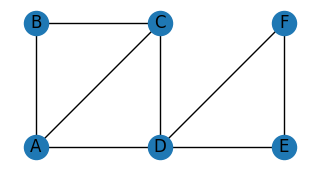

In [9]:
G = nx.Graph()
G.add_edges_from([('A','B'), ('A','C'), ('C','D'), ('B','C'), ('D','E'), 
                  ('A','D'), ('D','F'), ('E','F') ])
positions = {'A': np.array([ 0,0]), 'B': np.array([0,1]), 'C': np.array([ 1,1]), 
             'D': np.array([1,0]), 'E': np.array([2,0]), 'F': np.array([2,1])}
plt.figure(figsize=(3,1.5))
nx.draw(G, pos=positions)
_ = nx.draw_networkx_labels(G, positions)

Compute manually normalized betweenness for all nodes and edges:

In [10]:
# betweenness
G.nodes['A']['betweenness'] = 3/2
G.nodes['B']['betweenness'] = 0
G.nodes['C']['betweenness'] = 3/2
G.nodes['D']['betweenness'] = 6
G.nodes['E']['betweenness'] = 0
G.nodes['F']['betweenness'] = 0

G.edges['A','B']['betweenness'] = 1 + 3 * 1/2
G.edges['A','C']['betweenness'] = 1
G.edges['A','D']['betweenness'] = 4 + 1/2
G.edges['B','C']['betweenness'] = 1 + 3 * 1/2
G.edges['C','D']['betweenness'] = 4 + 1/2
G.edges['D','E']['betweenness'] = 4
G.edges['D','F']['betweenness'] = 4
G.edges['E','F']['betweenness'] = 1

# normalized betweenness
G.nodes['A']['normalized_betweenness'] = 3/2 / 10
G.nodes['B']['normalized_betweenness'] = 0
G.nodes['C']['normalized_betweenness'] = 3/2 / 10
G.nodes['D']['normalized_betweenness'] = 6 / 10
G.nodes['E']['normalized_betweenness'] = 0
G.nodes['F']['normalized_betweenness'] = 0

G.edges['A','B']['normalized_betweenness'] = (1 + 3 * 1/2) / 15
G.edges['A','C']['normalized_betweenness'] = 1 / 15
G.edges['A','D']['normalized_betweenness'] = (4 + 1/2) / 15
G.edges['B','C']['normalized_betweenness'] = (1 + 3 * 1/2) / 15
G.edges['C','D']['normalized_betweenness'] = (4 + 1/2) / 15
G.edges['D','E']['normalized_betweenness'] = 4 / 15
G.edges['D','F']['normalized_betweenness'] = 4 / 15
G.edges['E','F']['normalized_betweenness'] = 1 / 15

In [11]:
import itertools

for source, target in itertools.combinations(G.nodes(), 2):
    print(list(nx.all_shortest_paths(G, source, target)))

[['A', 'B']]
[['A', 'C']]
[['A', 'D']]
[['A', 'D', 'E']]
[['A', 'D', 'F']]
[['B', 'C']]
[['B', 'A', 'D'], ['B', 'C', 'D']]
[['B', 'A', 'D', 'E'], ['B', 'C', 'D', 'E']]
[['B', 'A', 'D', 'F'], ['B', 'C', 'D', 'F']]
[['C', 'D']]
[['C', 'D', 'E']]
[['C', 'D', 'F']]
[['D', 'E']]
[['D', 'F']]
[['E', 'F']]


In [12]:
btwns_centrality = nx.betweenness_centrality(G, normalized=False)

for n in G.nodes():
    print(f"Betweenness centrality of node {n}: manually {G.nodes[n]['betweenness']}"
          f" networkx {btwns_centrality[n]}")

Betweenness centrality of node A: manually 1.5 networkx 1.5
Betweenness centrality of node B: manually 0 networkx 0.0
Betweenness centrality of node C: manually 1.5 networkx 1.5
Betweenness centrality of node D: manually 6 networkx 6.0
Betweenness centrality of node E: manually 0 networkx 0.0
Betweenness centrality of node F: manually 0 networkx 0.0


In [13]:
norm_btwns_centrality = nx.betweenness_centrality(G, normalized=True)

for n in G.nodes():
    print(f"Normalized betweenness centrality of node {n}: manually {G.nodes[n]['normalized_betweenness']}"
          f" networkx {norm_btwns_centrality[n]}")

Normalized betweenness centrality of node A: manually 0.15 networkx 0.15000000000000002
Normalized betweenness centrality of node B: manually 0 networkx 0.0
Normalized betweenness centrality of node C: manually 0.15 networkx 0.15000000000000002
Normalized betweenness centrality of node D: manually 0.6 networkx 0.6000000000000001
Normalized betweenness centrality of node E: manually 0 networkx 0.0
Normalized betweenness centrality of node F: manually 0 networkx 0.0


In [14]:
edge_btwns_centrality = nx.edge_betweenness_centrality(G, normalized=False)

for source, target in G.edges():
    print(f"Betweenness centrality of edge {(source,target)}:"
          f" manually {G.edges[source,target]['betweenness']}"
          f" networkx {edge_btwns_centrality[source,target]}")

Betweenness centrality of edge ('A', 'B'): manually 2.5 networkx 2.5
Betweenness centrality of edge ('A', 'C'): manually 1 networkx 1.0
Betweenness centrality of edge ('A', 'D'): manually 4.5 networkx 4.5
Betweenness centrality of edge ('B', 'C'): manually 2.5 networkx 2.5
Betweenness centrality of edge ('C', 'D'): manually 4.5 networkx 4.5
Betweenness centrality of edge ('D', 'E'): manually 4 networkx 4.0
Betweenness centrality of edge ('D', 'F'): manually 4 networkx 4.0
Betweenness centrality of edge ('E', 'F'): manually 1 networkx 1.0


In [15]:
norm_edge_btwns_centrality = nx.edge_betweenness_centrality(G, normalized=True)

for source, target in G.edges():
    print(f"Normaized betweenness centrality of edge {(source,target)}:"
          f" manually {G.edges[source,target]['normalized_betweenness']}"
          f" networkx {norm_edge_btwns_centrality[source,target]}")

Normaized betweenness centrality of edge ('A', 'B'): manually 0.16666666666666666 networkx 0.16666666666666666
Normaized betweenness centrality of edge ('A', 'C'): manually 0.06666666666666667 networkx 0.06666666666666667
Normaized betweenness centrality of edge ('A', 'D'): manually 0.3 networkx 0.3
Normaized betweenness centrality of edge ('B', 'C'): manually 0.16666666666666666 networkx 0.16666666666666666
Normaized betweenness centrality of edge ('C', 'D'): manually 0.3 networkx 0.3
Normaized betweenness centrality of edge ('D', 'E'): manually 0.26666666666666666 networkx 0.26666666666666666
Normaized betweenness centrality of edge ('D', 'F'): manually 0.26666666666666666 networkx 0.26666666666666666
Normaized betweenness centrality of edge ('E', 'F'): manually 0.06666666666666667 networkx 0.06666666666666667


## Real-World Example

We will use data on United Kingdom's suffragette activists. Collected by the authors of the following paper

>Crossley, N., Edwards, G., Harries, E., & Stevenson, R. (2012). Covert social movement networks and the secrecy-efficiency trade off: The case of the UK suffragettes (1906–1914). Social Networks, 34(4), 634-644. https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/suffragettes

We will use the following code to load the data matrix 1216x398 person by arrest date and location (50 all 2M) and project it into a bipartite network. Some persons have two lines in the data file. We will merge perons with the same name. 

In [16]:
from pathlib import Path
from networkx import bipartite

# Create empty affiliation network and list of people
B = nx.Graph()

# peoples will be the first kind of nodes; we will collect them in a set
people = set()

# Load data file into network
with open('data/50_ALL_2M.csv') as f:
    # Parse header
    events = next(f).strip().split(",")[1:]

    # Parse rows
    for row in f:
        parts = row.strip().split(",")
        person = parts[0]
        people.add(person)
        for j, value in enumerate(parts[1:]):
            if value != "0":
                B.add_edge(person, events[j], weight=int(value))

# Project into person-person co-affilation network
G = bipartite.projected_graph(B, people)

Solve the following tasks:
1. Compute the betweenness centralities for nodes.
2. Sort nodes according to decreasing betweenness centrality.
3. Print 10 nodes with the highest betweenness centrality together with the respective value of the betweenness centrality.

In [17]:
from pprint import pprint

betweenness = nx.betweenness_centrality(G)
# your code goes here 

betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
pprint(betweenness_sorted[:10])

[('Maud Joachim', 0.07243758626807269),
 ('Ada Wright', 0.036076368823608894),
 ('Patricia Woodlock', 0.03392728299114596),
 ('Emily Duval', 0.026728216924555206),
 ('Mary Leigh', 0.026572540704336813),
 ('Mabel Capper', 0.02495270407317875),
 ('Sylvia Pankhurst', 0.024824299112025387),
 ('Elsie Evans', 0.021465397896986003),
 ('Winifred Mayo', 0.021364311921517637),
 ('Vera Wentworth', 0.018122229086134537)]


Next we will search suffragettes in the list of suffragettes in Wikipedia page [List of suffragists and suffragettes](https://en.wikipedia.org/wiki/List_of_suffragists_and_suffragettes).

In [18]:
from mediawiki import MediaWiki
import mediawiki
wikipedia = MediaWiki()

In [19]:
page = wikipedia.page('List of suffragists and suffragettes')
page.html.find('Maud Joachim')

222134

The first suffragette Maud Joachim is listed among the active suffraggettes. Create a plot where for $i$, the value is the number of suffraggettes listed in Wikipedia among the top $i$ sufraggettes according to the betweennes.

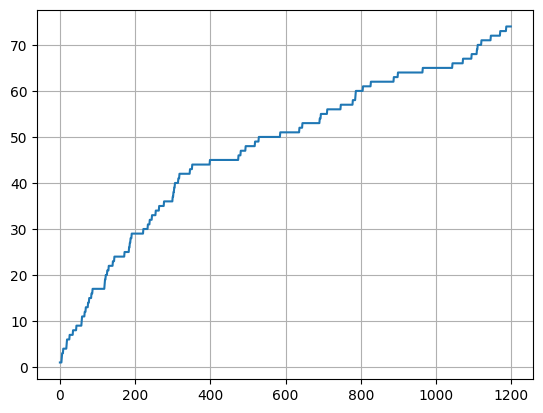

In [20]:
page = wikipedia.page('List of suffragists and suffragettes')
counter = []
counter.append(1 if page.html.find(betweenness_sorted[0][0]) != -1 else 0)
for i in range(1, 1200):
    counter.append(counter[i-1] + (1 if page.html.find(betweenness_sorted[i][0]) != -1 else 0))

plt.plot(counter)
plt.grid()

# Facebook Network Analysis

based on a [Networkx guide](https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html#betweenness-centrality).

Our data consists of the facebook circles (friends lists) of ten people. The dataset can be found at this link http://snap.stanford.edu/data/ego-Facebook.html. The network is undirected and has no weights. Each node represents an anonymized facebook user that belongs to one of those ten friends lists.
Each edge corresponds to the friendship of two facebook users that belong to this network. The ten original friends are the nodes $0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980$, we will call them the **spotlight nodes**.

In [21]:
# import packages 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

We load the edges from a gziped data file into a pandas dataframe. 

In [22]:
facebook = pd.read_csv(
    "data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


We create the network from the `facebook` dataframe of the edges:

In [23]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

Let us visualize the network.

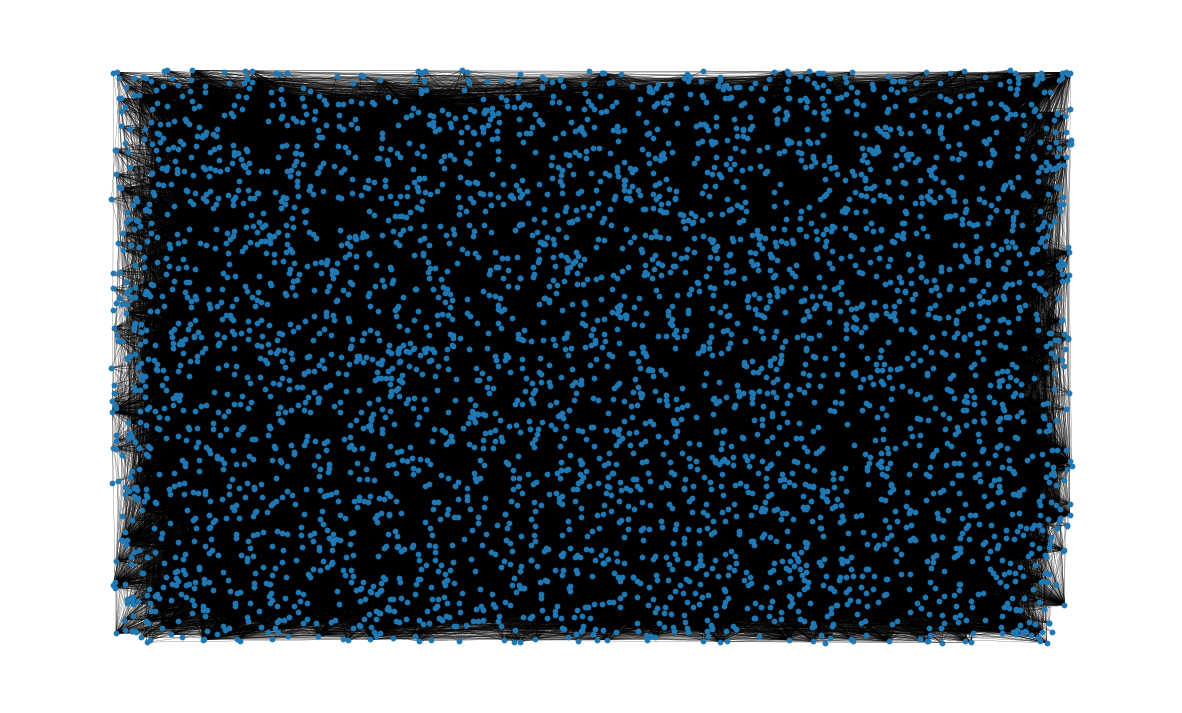

In [24]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

Such visualization is not helpful. Randomly positioned nodes are not useful. We can do better with `spring_layout`. However, we must limit the number of iterations to avoid long running time.


In [25]:
pos = nx.spring_layout(G, iterations=15, seed=1721)

In [26]:
spotlight_nodes = [0,107,348,414,686,698,1684,1912,3437,3980]

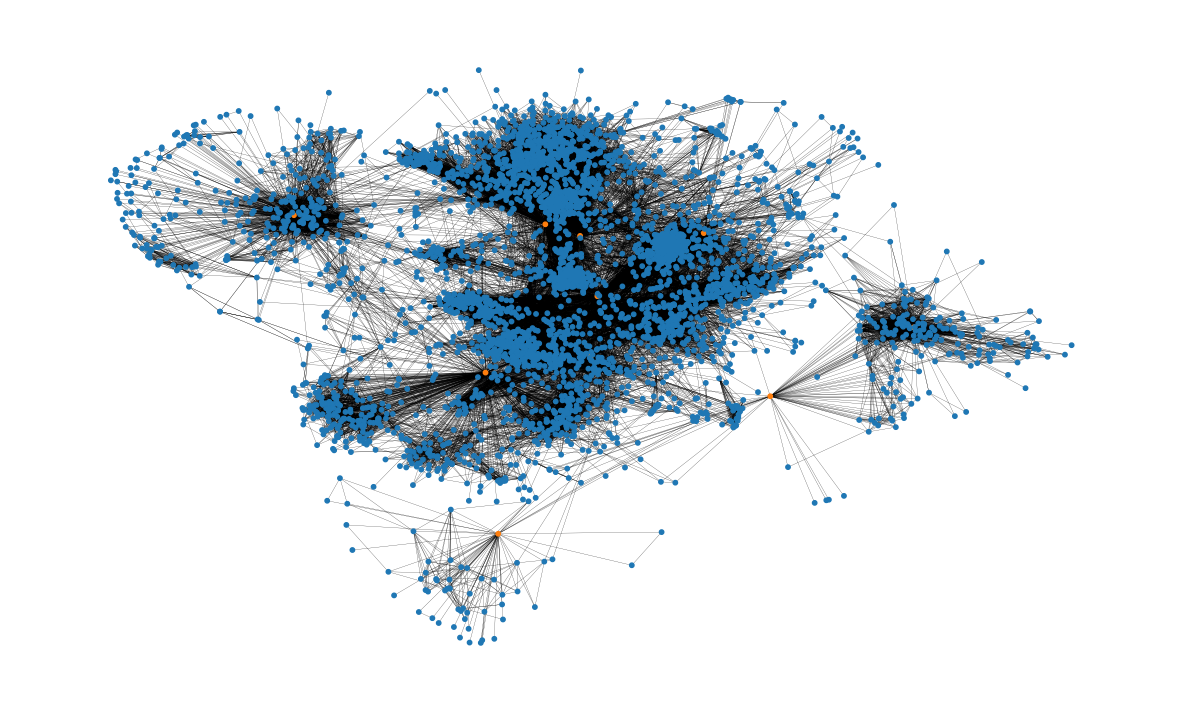

In [27]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
node_color = ['C1' if v in spotlight_nodes else 'C0' for v in G.nodes()]
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=node_color)


In [28]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Average degree:', 2*G.number_of_edges() / G.number_of_nodes())

Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784


We already know degree centrality.

In [29]:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

Text(0, 0.5, 'Counts')

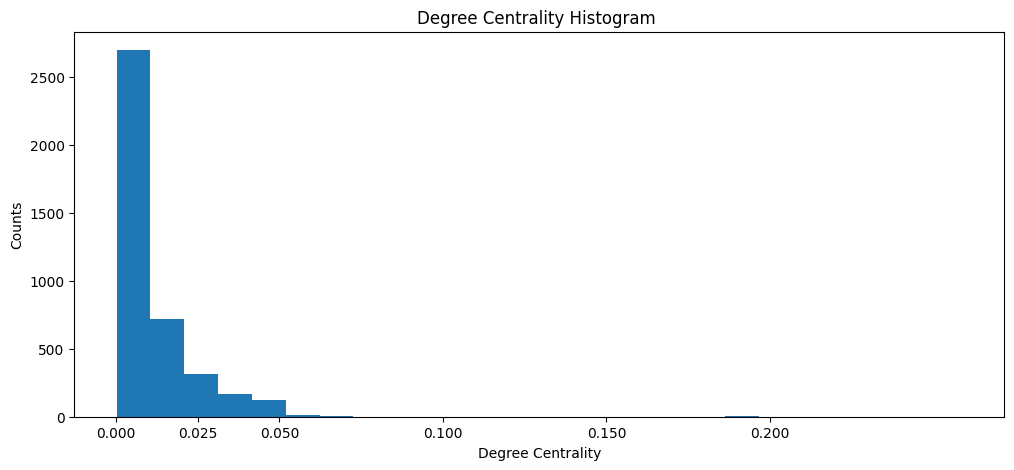

In [30]:
plt.figure(figsize=(12, 5))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ")
# plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality")
plt.ylabel("Counts")

Based on the degree centrality, we can vizualize the degrees.

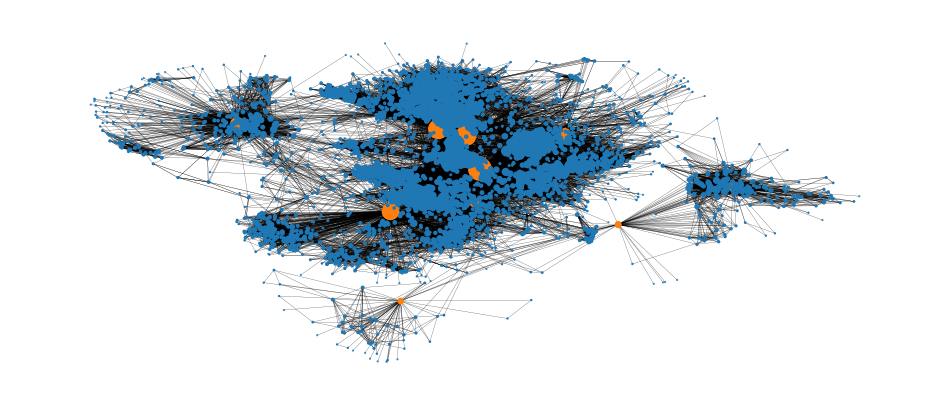

In [31]:
# set up nodes size for a nice graph representation
node_size = [v * 1000 for v in degree_centrality.values()] 
plt.figure(figsize=(12, 5))
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color=node_color, with_labels=False, width=0.15)
_ = plt.axis("off")

Similarly, we can calculate betweenness centrality.

In [32]:
betweenness_centrality = nx.centrality.betweenness_centrality(G)
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215),
 (58, 0.08436020590796486),
 (428, 0.06430906239323866)]

Text(0, 0.5, 'Counts')

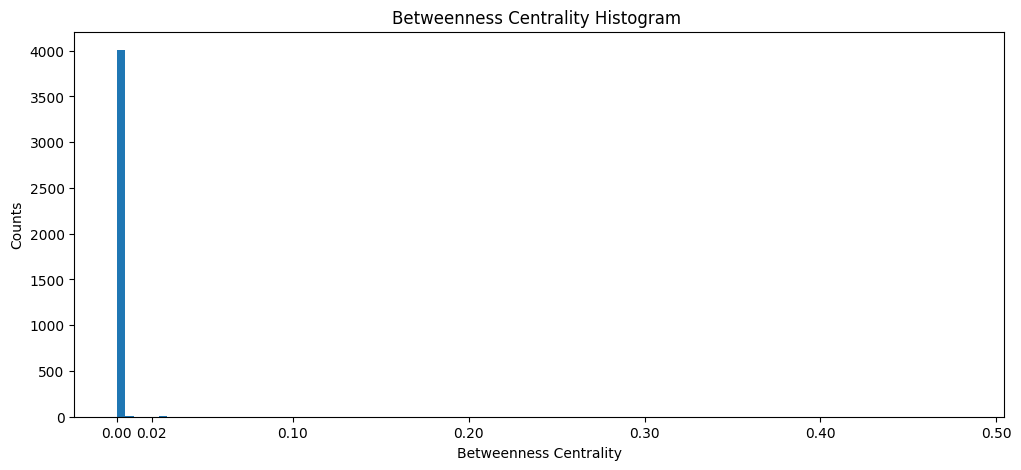

In [33]:
plt.figure(figsize=(12, 5))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Counts")

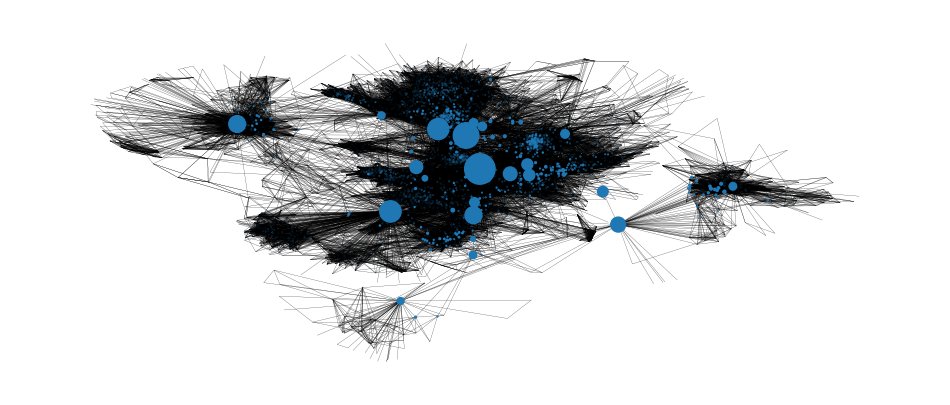

In [34]:
node_size = [v * 1000 for v in betweenness_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(12, 5))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
_ = plt.axis("off")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a447d70-2d4d-4a9c-90a1-a8ec65543279' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>